<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/02_neural_network_classification__with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# there is 3 types of classification problems

#1. Binary classification
#2. Multiclass classification
#3. Multilabel classification


 # Create data to view and fit
  

In [2]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples=1000
# Create circles
X,y=make_circles(n_samples,noise=0.03,
                 random_state=42)


In [3]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


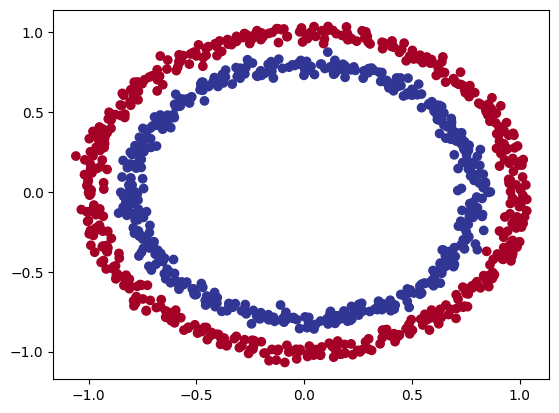

In [6]:
# Visualized with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Import and output shapes


In [7]:
# Check the shapes of our features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [8]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [9]:
# How many sample we're working
len(X),len(y)

(1000, 1000)

In [10]:
# View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [11]:
import tensorflow as tf
tf.random.set_seed(42)
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Complie the model
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
                )
# 3. Fit
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4730 - loss: 7.0290    
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4707 - loss: 0.2258 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4640 - loss: 0.1851 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4718 - loss: 0.1769 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4692 - loss: 0.1749 


In [12]:
# let's try and improve
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4856 - loss: 0.1732  


[0.17335325479507446, 0.47200000286102295]

In [13]:
tf.random.set_seed(42)
# 1. create a model with 2 layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# 2. compile
model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3.fit
model_2.fit(X,y,epochs=100,verbose=0)

In [14]:
#4. evaluate
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 0.1733  


[0.17331811785697937, 0.5]

In [15]:
circles["label"].value_counts()

,count
label,
1,500
0,500


# Improve our model
1. Create a model - add more layres or increase the numbers of hidden units
2. compile a model - choose different optmizers
3. fit a model


In [16]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
# set the random seed
tf.random.set_seed(42)

#1. Create the model 3 layers
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#3. fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [18]:
# 4. evaluate
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5080 - loss: 0.6915  


[0.6952721476554871, 0.492000013589859]

In [19]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 0.1733 


[0.17331811785697937, 0.5]

In [20]:
model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.52215856],
       [0.45792297],
       [0.45585647],
       [0.48354536],
       [0.48709193],
       [0.4796564 ],
       [0.50148904],
       [0.52123445],
       [0.46372905],
       [0.5012883 ],
       [0.4489735 ],
       [0.5265081 ],
       [0.4977179 ],
       [0.5102552 ],
       [0.49973696],
       [0.47924414],
       [0.44068247],
       [0.47521   ],
       [0.45032206],
       [0.44504482],
       [0.52115285],
       [0.479701  ],
       [0.46590015],
       [0.5224767 ],
       [0.4575341 ],
       [0.45132104],
       [0.5174115 ],
       [0.5176053 ],
       [0.48171997],
       [0.5045082 ],
       [0.45552027],
       [0.49647406],
       [0.50201917],
       [0.52827793],
       [0.46166566],
       [0.4670433 ],
       [0.47390625],
       [0.5188851 ],
       [0.4826485 ],
       [0.52980494],
       [0.44635123],
       [0.51970667],
       [0.44334656],
       [0.51620144],
       [0.44028953],
       [0.44163087],
       [0.4923883 ],
       [0.511

# visualization
* feature X , label y
* create a meshgrid of the different X values

In [21]:
import numpy as np
def plot_decision_boundary (model,X,y):
  # Define the axis boundaries of the plot
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max),
                    np.linspace(y_min,y_max))
  # create X value
  x_in=np.c_[xx.ravel(),yy.ravel()]

  # make prediction
  y_pred = model.predict(x_in)
  # check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    # we have a reshape
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #plot
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


<ipython-input-21-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


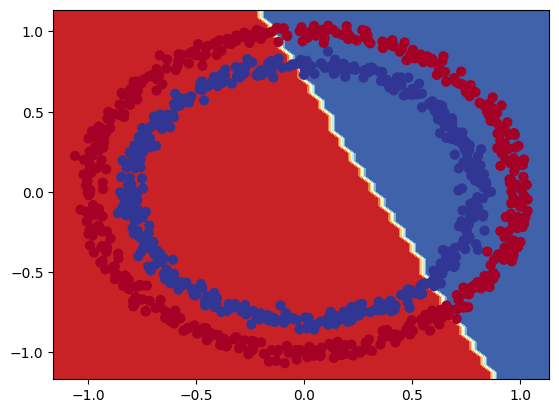

In [22]:
# Check out the prediction
plot_decision_boundary(model=model_3,X=X,y=y)

In [23]:
# # Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# create some regression data
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) # y=x+100
# split
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


In [24]:

# # fit
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
#             y_reg_train,
#             epochs=100)

In [25]:
# Setup random seed
tf.random.set_seed(42)

# 1. Crate the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
# 3.fit
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 496.6272 - mae: 496.6272
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 357.2007 - mae: 357.2007 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 216.3044 - mae: 216.3044 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.6318 - mae: 78.6318   
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.4811 - mae: 74.4811 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.1659 - mae: 89.1659 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.0689 - mae: 57.0689 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.1945 - mae: 47.1945 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.4365 - mae: 46.4365 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.7662 - mae: 44.7662 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.5119 - mae: 44.5119 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.7879 - mae: 40.7879 
Epoch 13/100
5/5 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


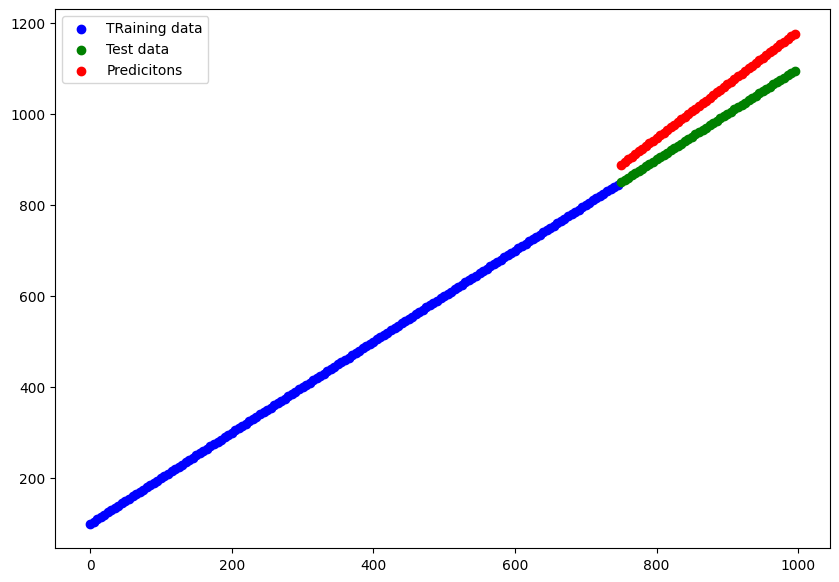

In [26]:
y_reg_pred=model_3.predict(X_reg_test)
# plot the model prediction
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b", label="TRaining data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_pred,c="r",label="Predicitons")
plt.legend()

# Non-linerarity

In [27]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3.fit
history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4266 - loss: 4.4387
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4333 - loss: 4.3518
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4359 - loss: 4.3418
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4413 - loss: 4.3290
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4424 - loss: 4.3132
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4414 - loss: 4.2780
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 4.2110 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4496 - loss: 4.1833 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4557 - loss: 4.0691 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4569 - loss: 3.9755 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4589 - loss: 3.9488 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

<ipython-input-28-835e5ad0f53e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0],X[:,1],c="y",cmap=plt.cm.RdYlBu);


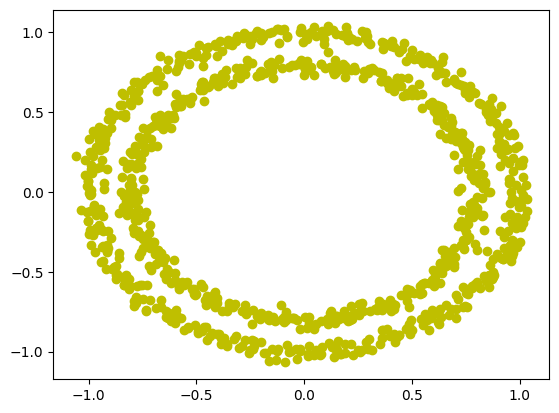

In [28]:
plt.scatter(X[:,0],X[:,1],c="y",cmap=plt.cm.RdYlBu);

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
doing binary classification


<ipython-input-21-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


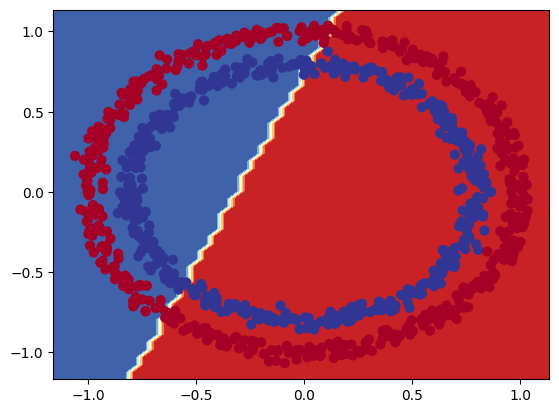

In [29]:
plot_decision_boundary(model=model_4,
                       X=X,y=y)

# Build nural network with non-linear

In [30]:
# Set random seed
tf.random.set_seed(42)
#create a model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")

])

# compile
model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#fit
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4587 - loss: 6.9708
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4539 - loss: 6.6754 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4582 - loss: 6.5023  
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4581 - loss: 6.3484 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4573 - loss: 6.0733 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4552 - loss: 5.9964 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4534 - loss: 5.8395 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4533 - loss: 5.7816 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4519 - loss: 5.6330 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4519 - loss: 5.3766 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4524 - loss: 5.3579 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

In [31]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4830 - loss: 1.2491
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4818 - loss: 1.0046 
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4295 - loss: 0.9231 
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3646 - loss: 0.8780 
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3378 - loss: 0.8502 
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3463 - loss: 0.8317 
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3620 - loss: 0.8180 
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3735 - loss: 0.8073 
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3669 - loss: 0.7987 
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3556 - loss: 0.7913 
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3469 - loss: 0.7846 
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [32]:
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9876 - loss: 0.0681  


[0.07238050550222397, 0.9860000014305115]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
doing binary classification


<ipython-input-21-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


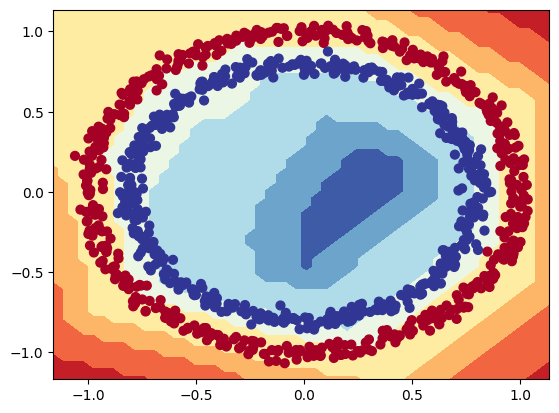

In [33]:
plot_decision_boundary(model_6,X,y)

In [34]:
tf.random.set_seed(42)

# 1. create a model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#2. compile
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3.fit
model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4955 - loss: 0.7057
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.7030 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4902 - loss: 0.7011 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4898 - loss: 0.6994 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4982 - loss: 0.6978 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 0.6959 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4947 - loss: 0.6942 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6927 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 0.6913 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5115 - loss: 0.6900 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5064 - loss: 0.6888 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [35]:
# evaluate
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9741 - loss: 0.2690  


[0.2609502077102661, 0.9760000109672546]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
doing binary classification


<ipython-input-21-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


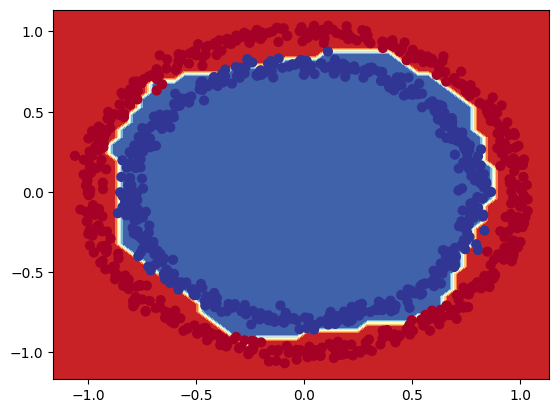

In [36]:
# Visualize
plot_decision_boundary(model_7,X,y)

In [37]:
# Create a toy tensor (similar to the data we pass into our models)
A=tf.cast(tf.range(-10,10),tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

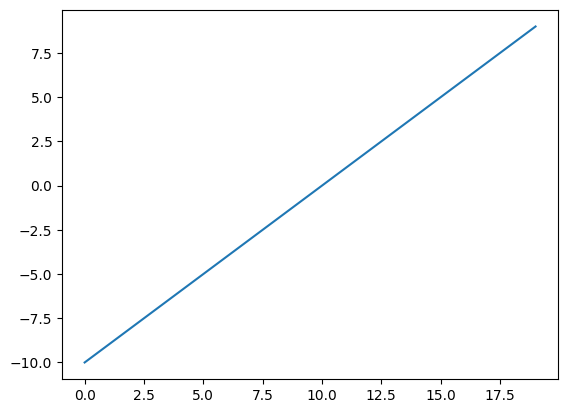

In [38]:
# Visualize toy
plt.plot(A)

In [39]:
# replicate sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))


# use sigmoid
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

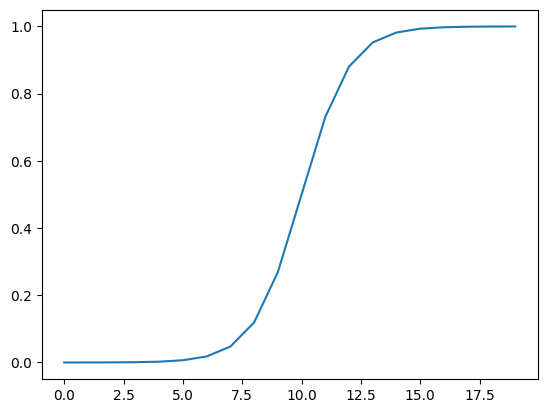

In [40]:
plt.plot(sigmoid(A))

# relu

In [41]:
def relu(x):
  return tf.maximum(0,x)


relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

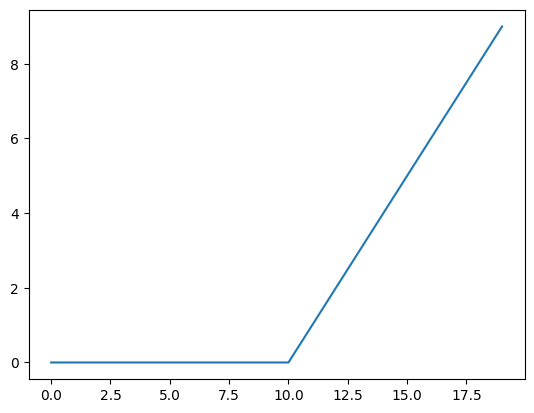

In [42]:
plt.plot(relu(A))

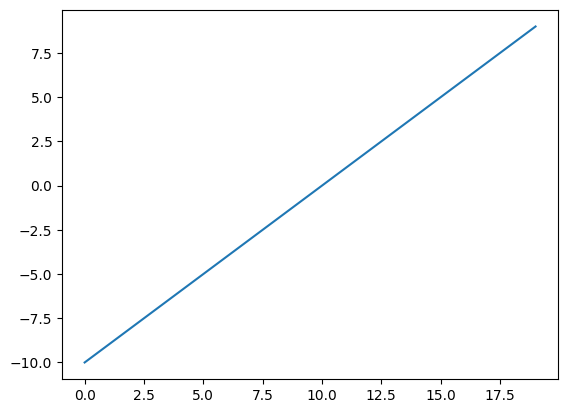

In [43]:
plt.plot(A)

In [44]:
#Let's try liner activiation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

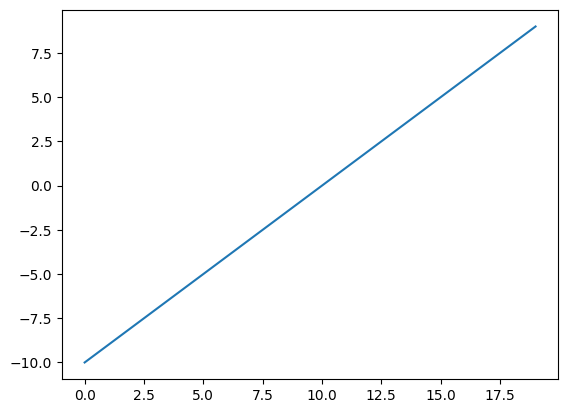

In [45]:
# Dose liner activiation change anything?
plt.plot(tf.keras.activations.linear(A))

In [46]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluation and improving our classification


In [47]:
len(X)

1000

In [48]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [49]:
# split into train , test sets
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [79]:
# Let's recreate a model to fit the data
#Set random
tf.random.set_seed(42)

#1. create a model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2.compile
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
#3.Fit the model
model_8.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4463 - loss: 0.7122
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4765 - loss: 0.6958
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 0.6898
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5119 - loss: 0.6834 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5212 - loss: 0.6757 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5582 - loss: 0.6659 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 0.6515 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - loss: 0.6318 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7164 - loss: 0.6051
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7565 - loss: 0.5721
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.5252
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [80]:
# 4. evaluate
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9918 - loss: 0.0300  


[0.04416454955935478, 0.9850000143051147]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
doing binary classification
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-21-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


doing binary classification


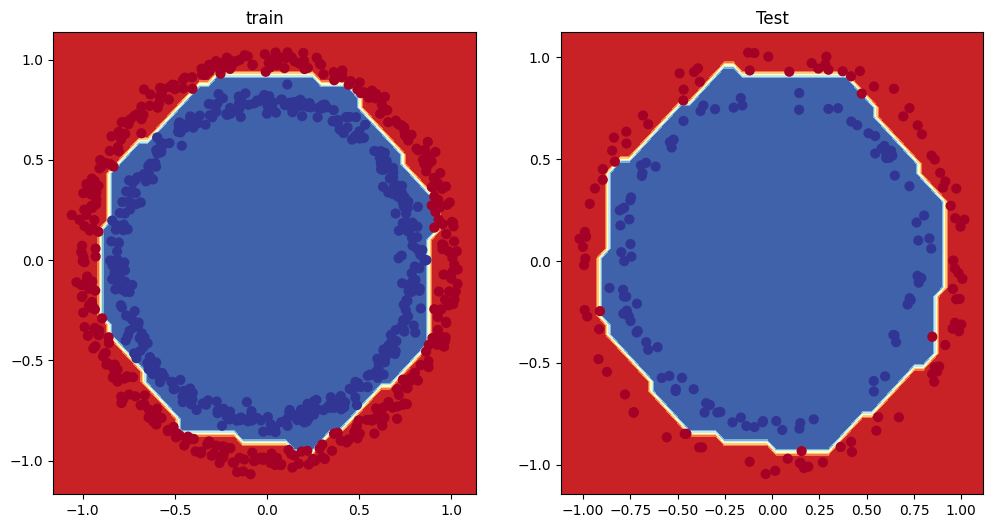

In [81]:
# plot the decision boundarires
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show()


# plot the loss(or training )


In [82]:
# convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.500,1.141364
1,0.492,0.968562
2,0.416,0.901776
3,0.356,0.864572
4,0.346,0.841448
...,...,...
245,0.986,0.076230
246,0.986,0.075616
247,0.985,0.075115
248,0.987,0.074784


Text(0.5, 1.0, 'Model_8 loss curves')

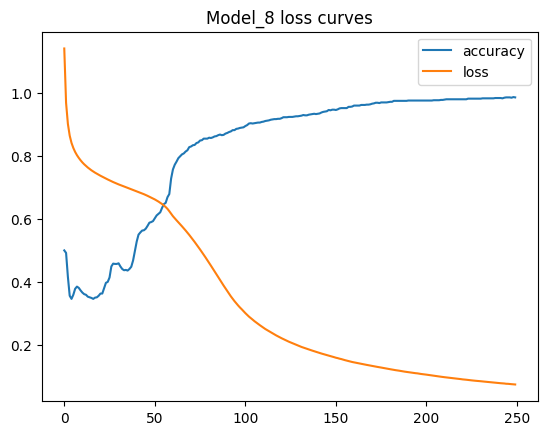

In [83]:
#plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learing rate

In [84]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/2))

# Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4932 - loss: 0.6973 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4980 - loss: 0.6972 - learning_rate: 3.1623e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4921 - loss: 0.6966 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4716 - loss: 0.6954 - learning_rate: 0.0032
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4870 - loss: 0.6935 - learning_rate: 0.0100
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5239 - loss: 0.6897 - learning_rate: 0.0316
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5627 - loss: 0.6737 - learning_rate: 0.1000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5298 - loss: 0.7304 - learning_rate: 0.3162
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5008 - loss: 0.7042 - learning_rate: 1.0000
Epoch 10/10

<Axes: xlabel='epochs'>

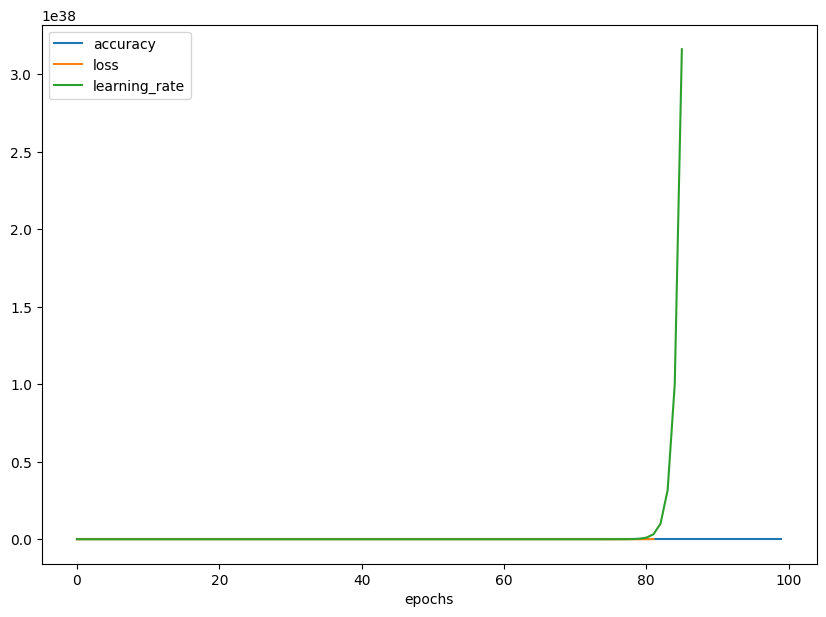

In [85]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

In [86]:
lrs=1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [87]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate')

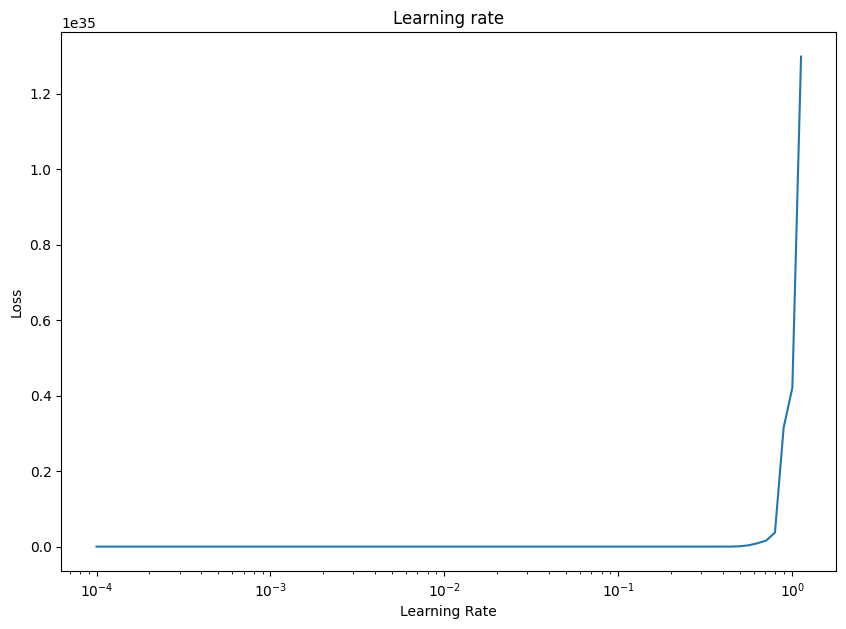

In [88]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate")

In [89]:
10**0,10*-1,10,-2,10-3,1e-4

(1, -10, 10, -2, 7, 0.0001)

In [90]:
10**-2

0.01

In [91]:
# Try higher learning rate
tf.random.set_seed(42)

# create a model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# fit
model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5224 - loss: 0.6940
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5179 - loss: 0.6895 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5285 - loss: 0.6870  
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5336 - loss: 0.6804 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5587 - loss: 0.6736 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5773 - loss: 0.6653 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5928 - loss: 0.6547 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6241 - loss: 0.6363 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7359 - loss: 0.5894  
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7316 - loss: 0.5368 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.4831 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [93]:
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.1027  


[0.10452046990394592, 0.9800000190734863]

In [94]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.0300 


[0.04416454955935478, 0.9850000143051147]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
doing binary classification


<ipython-input-21-63b16a416832>:23: UserWarning: The following kwargs were not used by contour: 'alfa'
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alfa=0.7)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
doing binary classification


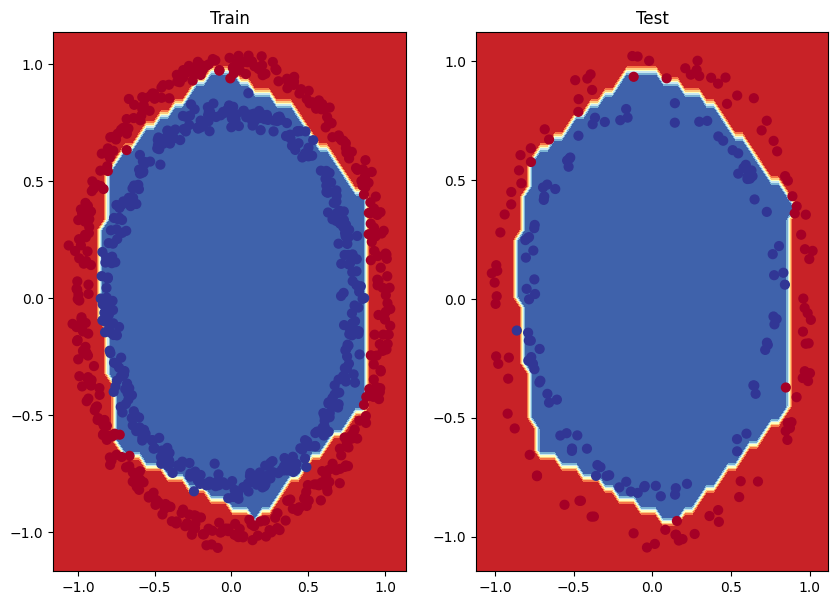

In [97]:
#plot
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)

# Evaluation in classification
* accuracy metrics=[".."]
* precision metrics=["percision"]
* recall metrics=["recall"]
* F1-score metrics=["F1-score"]
* confusion_matrix metrics=["con.."]
* classification_report

In [99]:
# Check the accuracy
loss , accuracy=model_10.evaluate(X_test,y_test)
print(f"Model loss : {loss}")
print(f"Model accuracy : {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.1027 
Model loss : 0.10452046990394592
Model accuracy : 98.00%
